In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

report_date = datetime(2020, 1, 1)

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# 1. Import và làm sạch dữ liệu

In [2]:
# Dùng để in danh sách các giá trị trong các cột để kiểm tra
def print_info_all_columns(df, lst):
    i = 1

    for obj in lst:
        print(f'{i}/{obj}\t{len(df[obj].unique())}: {df[obj].unique() if len(df[obj].unique()) < 50 else ""}')

        i +=1

In [3]:
def print_info_all_columns_numbers(df, lst):
    i = 1

    for obj in lst:
        print(f'{i}/{obj}\t{len(df[obj].unique())}: {df[obj].unique() if len(df[obj].unique()) < 150 else ""}')

        i +=1

In [4]:
def vitri_new(x):
    if 'Chuyên viên' in x:
        return 'Chuyên viên'
    elif 'Cộng tác viên' in x:
        return 'Cộng tác viên'
    elif 'Trưởng phòng' in x:
        return 'Trưởng phòng'
    elif 'Giám đốc' in x:
        return 'Giám đốc'

In [5]:
df = pd.read_csv('HR_DATA.csv')

df

,employee_code,employee_first_name,employee_last_name,employee_work_date,ID,statement_employee_code,statement_type,statement_code,statement_valid_date,statement_expired_date,...,PC900,KH100,KH200,KH300,HAM,NG_PHU,created_at,modified_at,PB,ETL_timestamp
0,10000000,Trần Nam,Anh,7/30/2019,1.910000e+18,10000000,ZE - Đánh giá,10000000/ANHTN13/20190928/ZE-EA/10000000/VA00/...,9/28/2019,12/31/9999,...,0.0,NaN,TRANGTTK,TEG.EVN.SH.TSG.PSGC,NaN,NaN,9/30/2019,9/30/2019,TEG.EVN.SH.TSG.PSGC,59:16.9
1,10000019,Lê,Minh,1/8/2019,1.910000e+18,10000019,ZA - Tuyển mới,10000019/MINHL/20190801/ZA-AD/10000019/VA00/99...,1/8/2019,12/31/9999,...,15000000.0,NaN,TUANPM,TEG,NaN,NaN,1/8/2019,1/8/2019,NaN,59:16.9
2,10000028,Hoàng Hồng,Nhung,1/8/2019,1.910000e+17,10000028,ZF - Gia hạn Hợp đồng,10000028/NHUNGHH/20190930/ZF-FA/10000028/VA00/...,9/30/2019,12/31/9999,...,0.0,NaN,LINHTTK,TEG.NVN.SO8.TOSB.POSB2,NaN,NaN,9/26/2019,9/26/2019,TEG.NVN.SO8.TOSB.POSB2,59:16.9
3,10000030,Đoàn Thị Quỳnh,Anh,1/8/2019,1.910000e+17,10000030,ZF - Gia hạn Hợp đồng,10000030/ANHDTQ7/20190930/ZF-FA/10000030/VA00/...,9/30/2019,12/31/9999,...,0.0,NaN,HANHPN,TEG.NVN.SO8.TOSB.POSB1,NaN,NaN,9/26/2019,9/26/2019,TEG.NVN.SO8.TOSB.POSB1,59:16.9
4,10000031,Ngô Thị Minh,Thu,1/8/2019,1.910000e+17,10000031,ZF - Gia hạn Hợp đồng,10000031/THUNTM9/20190930/ZF-FA/10000031/VA00/...,9/30/2019,12/31/9999,...,0.0,NaN,LINHTTK,TEG.NVN.SO8.TOSB.POSB2,NaN,NaN,2/10/2019,2/10/2019,TEG.NVN.SO8.TOSB.POSB2,59:16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,907345,Teerakraveekul,Natchapol,8/15/2019,1.910000e+16,907345,ZA - Tuyển mới,907345/NATCHAPOL/20190815/ZA-AA/00907345/TA00/...,8/15/2019,12/31/9999,...,490.0,NaN,HIENNTT5,TEG.ETL.TSH.TES.PESO 1,NaN,NaN,8/20/2019,8/20/2019,TEG.ETL.TSH.TES.PESO 1,59:16.9
2582,907346,Asavataweechok,Sahachai,8/15/2019,1.910000e+16,907346,ZA - Tuyển mới,907346/SAHACHAI/20190815/ZA-AA/00907346/TA00/9...,8/15/2019,12/31/9999,...,490.0,NaN,HIENNTT5,TEG.ETL.TSH.TES.PESO 1,NaN,NaN,8/20/2019,8/20/2019,TEG.ETL.TSH.TES.PESO 1,59:16.9
2583,907347,Panpui,Nichapat,8/19/2019,1.910000e+15,907347,ZA - Tuyển mới,907347/NICHAPAT/20190819/ZA-AA/00907347/TA00/9...,8/19/2019,12/31/9999,...,490.0,NaN,NGUYENLT2,TEG.ETL.TSH.TEC,NaN,NaN,8/21/2019,8/21/2019,NaN,59:16.9
2584,907348,Chookorn,Pimra,8/19/2019,1.910000e+15,907348,ZA - Tuyển mới,907348/PIMRA/20190819/ZA-AA/00907348/TA00/9999...,8/19/2019,12/31/9999,...,490.0,NaN,NAMFON2,TEG.OTL.SOT.TGS,NaN,NaN,8/21/2019,8/21/2019,NaN,59:16.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_code            2586 non-null   int64  
 1   employee_first_name      2585 non-null   object 
 2   employee_last_name       2584 non-null   object 
 3   employee_work_date       2582 non-null   object 
 4   ID                       2586 non-null   float64
 5   statement_employee_code  2586 non-null   int64  
 6   statement_type           2586 non-null   object 
 7   statement_code           2571 non-null   object 
 8   statement_valid_date     2586 non-null   object 
 9   statement_expired_date   2586 non-null   object 
 10  statement_created_date   2586 non-null   object 
 11  statement_status         2586 non-null   object 
 12  statement_note           0 non-null      float64
 13  statement_file_scan      0 non-null      float64
 14  statement_name          

In [7]:
# Các cột mà null hết thì xoá đi cho gọn
df.dropna(axis=1, how='all', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_code            2586 non-null   int64  
 1   employee_first_name      2585 non-null   object 
 2   employee_last_name       2584 non-null   object 
 3   employee_work_date       2582 non-null   object 
 4   ID                       2586 non-null   float64
 5   statement_employee_code  2586 non-null   int64  
 6   statement_type           2586 non-null   object 
 7   statement_code           2571 non-null   object 
 8   statement_valid_date     2586 non-null   object 
 9   statement_expired_date   2586 non-null   object 
 10  statement_created_date   2586 non-null   object 
 11  statement_status         2586 non-null   object 
 12  statement_name           2586 non-null   object 
 13  HRC                      2569 non-null   object 
 14  PT                      

In [8]:
df['HAM'][df['HAM'].isnull() == False].unique()

array(['TM1', 'PM1', 'TM2', 'SM1', 'SM2', 'CX2', 'CM2', 'TX2', 'SX2'],
      dtype=object)

In [9]:
# Xoá bớt các cột không cần thiết
df.drop(columns=['ETL_timestamp', 'ID', 'employee_first_name', 'employee_last_name', 'statement_employee_code','statement_code','DVC',
                 'KN', 'PC100','PC900','KH300','HAM','PB', 'DV', 'statement_created_date',
                 'created_at', 'modified_at'], inplace=True)

df.head()

,employee_code,employee_work_date,statement_type,statement_valid_date,statement_expired_date,statement_status,statement_name,HRC,PT,CDT,HD,SP,CH,HRB,CB,NG,work_location,KH200
0,10000000,7/30/2019,ZE - Đánh giá,9/28/2019,12/31/9999,active,EA - Đánh giá sau thử việc,806412,TE - Công ty CP giáo dục Topica English,TEG.EVN.SH.TSG,HD.CHI.O.WM,TEG.EVN,30,HRB1100.A,OX2-Chuyên viên,WMT-Chuyên gia Chạy số,Hà Nội,TRANGTTK
1,10000019,1/8/2019,ZA - Tuyển mới,1/8/2019,12/31/9999,active,AD - Tuyển mới NV định biên còn thiếu ko thử việc,806723,TE - Công ty CP giáo dục Topica English,TEG,HD.CHI.T.IB,TEG,30,HRB1100.A,CM1-Giám đốc Sản phẩm,IBB-Phân tích dữ liệu,Hà Nội,TUANPM
2,10000028,1/8/2019,ZF - Gia hạn Hợp đồng,9/30/2019,12/31/9999,active,FA - Gia hạn do hết hạn HD,800346,TE - Công ty CP giáo dục Topica English,TEG.NVN.SO8.TOSB,HD.CHI.O.WS,TEG.NVN,30,HRB1300,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK
3,10000030,1/8/2019,ZF - Gia hạn Hợp đồng,9/30/2019,12/31/9999,active,FA - Gia hạn do hết hạn HD,806220,TE - Công ty CP giáo dục Topica English,TEG.NVN.SO8.TOSB,HD.CHI.O.WS,TEG.NVN,30,HRB1300,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,HANHPN
4,10000031,1/8/2019,ZF - Gia hạn Hợp đồng,9/30/2019,12/31/9999,active,FA - Gia hạn do hết hạn HD,806217,TE - Công ty CP giáo dục Topica English,TEG.NVN.SO8.TOSB,HD.CHI.O.WS,TEG.NVN,30,HRB1300,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK


In [10]:
df.head()

,employee_code,employee_work_date,statement_type,statement_valid_date,statement_expired_date,statement_status,statement_name,HRC,PT,CDT,HD,SP,CH,HRB,CB,NG,work_location,KH200
0,10000000,7/30/2019,ZE - Đánh giá,9/28/2019,12/31/9999,active,EA - Đánh giá sau thử việc,806412,TE - Công ty CP giáo dục Topica English,TEG.EVN.SH.TSG,HD.CHI.O.WM,TEG.EVN,30,HRB1100.A,OX2-Chuyên viên,WMT-Chuyên gia Chạy số,Hà Nội,TRANGTTK
1,10000019,1/8/2019,ZA - Tuyển mới,1/8/2019,12/31/9999,active,AD - Tuyển mới NV định biên còn thiếu ko thử việc,806723,TE - Công ty CP giáo dục Topica English,TEG,HD.CHI.T.IB,TEG,30,HRB1100.A,CM1-Giám đốc Sản phẩm,IBB-Phân tích dữ liệu,Hà Nội,TUANPM
2,10000028,1/8/2019,ZF - Gia hạn Hợp đồng,9/30/2019,12/31/9999,active,FA - Gia hạn do hết hạn HD,800346,TE - Công ty CP giáo dục Topica English,TEG.NVN.SO8.TOSB,HD.CHI.O.WS,TEG.NVN,30,HRB1300,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK
3,10000030,1/8/2019,ZF - Gia hạn Hợp đồng,9/30/2019,12/31/9999,active,FA - Gia hạn do hết hạn HD,806220,TE - Công ty CP giáo dục Topica English,TEG.NVN.SO8.TOSB,HD.CHI.O.WS,TEG.NVN,30,HRB1300,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,HANHPN
4,10000031,1/8/2019,ZF - Gia hạn Hợp đồng,9/30/2019,12/31/9999,active,FA - Gia hạn do hết hạn HD,806217,TE - Công ty CP giáo dục Topica English,TEG.NVN.SO8.TOSB,HD.CHI.O.WS,TEG.NVN,30,HRB1300,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK


In [11]:
df.isnull().sum()

employee_code               0
employee_work_date          4
statement_type              0
statement_valid_date        0
statement_expired_date      0
statement_status            0
statement_name              0
HRC                        17
PT                          0
CDT                         0
HD                          0
SP                          0
CH                          0
HRB                         0
CB                          0
NG                          0
work_location               0
KH200                     164
dtype: int64

In [12]:
df['KH200'].value_counts()

KH200
NGUYENLT2       164
NAMFON2         130
HAONT2          128
TRUNGNT         111
PHUCDV          102
               ... 
DOANHCX           1
NGOCNTB4          1
ARPHA.PAIROJ      1
KIENPC            1
QUANNV            1
Name: count, Length: 129, dtype: int64

In [13]:
df.rename(
    columns={
        'KH200': 'Leader_Code'
    }, inplace=True
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   employee_code           2586 non-null   int64 
 1   employee_work_date      2582 non-null   object
 2   statement_type          2586 non-null   object
 3   statement_valid_date    2586 non-null   object
 4   statement_expired_date  2586 non-null   object
 5   statement_status        2586 non-null   object
 6   statement_name          2586 non-null   object
 7   HRC                     2569 non-null   object
 8   PT                      2586 non-null   object
 9   CDT                     2586 non-null   object
 10  HD                      2586 non-null   object
 11  SP                      2586 non-null   object
 12  CH                      2586 non-null   object
 13  HRB                     2586 non-null   object
 14  CB                      2586 non-null   object
 15  NG  

In [14]:
# Nếu cột employee_work_date mà không có dữ liệu thì xoá ngay dòng đó đi
df.dropna(axis=0, how='any', inplace=True, subset=['employee_work_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2582 entries, 0 to 2585
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   employee_code           2582 non-null   int64 
 1   employee_work_date      2582 non-null   object
 2   statement_type          2582 non-null   object
 3   statement_valid_date    2582 non-null   object
 4   statement_expired_date  2582 non-null   object
 5   statement_status        2582 non-null   object
 6   statement_name          2582 non-null   object
 7   HRC                     2566 non-null   object
 8   PT                      2582 non-null   object
 9   CDT                     2582 non-null   object
 10  HD                      2582 non-null   object
 11  SP                      2582 non-null   object
 12  CH                      2582 non-null   object
 13  HRB                     2582 non-null   object
 14  CB                      2582 non-null   object
 15  NG       

In [15]:
df['Leader_Code'].fillna(value='No Leader', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2582 entries, 0 to 2585
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   employee_code           2582 non-null   int64 
 1   employee_work_date      2582 non-null   object
 2   statement_type          2582 non-null   object
 3   statement_valid_date    2582 non-null   object
 4   statement_expired_date  2582 non-null   object
 5   statement_status        2582 non-null   object
 6   statement_name          2582 non-null   object
 7   HRC                     2566 non-null   object
 8   PT                      2582 non-null   object
 9   CDT                     2582 non-null   object
 10  HD                      2582 non-null   object
 11  SP                      2582 non-null   object
 12  CH                      2582 non-null   object
 13  HRB                     2582 non-null   object
 14  CB                      2582 non-null   object
 15  NG       

In [16]:
# Convert 2 cột date về dạng date
def str_parse_date(x):
    from datetime import datetime

    if x == '12/31/9999':
        return datetime.strptime('2100/12/31', '%Y/%m/%d')

    return datetime.strptime(x, '%m/%d/%Y')

In [17]:
df['statement_valid_date'] = df['statement_valid_date'].apply(lambda x: str_parse_date(x))

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2582 entries, 0 to 2585
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   employee_code           2582 non-null   int64         
 1   employee_work_date      2582 non-null   object        
 2   statement_type          2582 non-null   object        
 3   statement_valid_date    2582 non-null   datetime64[ns]
 4   statement_expired_date  2582 non-null   object        
 5   statement_status        2582 non-null   object        
 6   statement_name          2582 non-null   object        
 7   HRC                     2566 non-null   object        
 8   PT                      2582 non-null   object        
 9   CDT                     2582 non-null   object        
 10  HD                      2582 non-null   object        
 11  SP                      2582 non-null   object        
 12  CH                      2582 non-null   object       

In [18]:
df['statement_expired_date'] = df['statement_expired_date'].apply(lambda x: str_parse_date(x))

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2582 entries, 0 to 2585
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   employee_code           2582 non-null   int64         
 1   employee_work_date      2582 non-null   object        
 2   statement_type          2582 non-null   object        
 3   statement_valid_date    2582 non-null   datetime64[ns]
 4   statement_expired_date  2582 non-null   datetime64[ns]
 5   statement_status        2582 non-null   object        
 6   statement_name          2582 non-null   object        
 7   HRC                     2566 non-null   object        
 8   PT                      2582 non-null   object        
 9   CDT                     2582 non-null   object        
 10  HD                      2582 non-null   object        
 11  SP                      2582 non-null   object        
 12  CH                      2582 non-null   object       

In [19]:
df['employee_work_date'] = df['employee_work_date'].apply(lambda x: str_parse_date(x))

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2582 entries, 0 to 2585
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   employee_code           2582 non-null   int64         
 1   employee_work_date      2582 non-null   datetime64[ns]
 2   statement_type          2582 non-null   object        
 3   statement_valid_date    2582 non-null   datetime64[ns]
 4   statement_expired_date  2582 non-null   datetime64[ns]
 5   statement_status        2582 non-null   object        
 6   statement_name          2582 non-null   object        
 7   HRC                     2566 non-null   object        
 8   PT                      2582 non-null   object        
 9   CDT                     2582 non-null   object        
 10  HD                      2582 non-null   object        
 11  SP                      2582 non-null   object        
 12  CH                      2582 non-null   object       

In [20]:
# Xoá đi cột employee_code
df = df.drop(columns=['employee_code'])

df.head()

,employee_work_date,statement_type,statement_valid_date,statement_expired_date,statement_status,statement_name,HRC,PT,CDT,HD,SP,CH,HRB,CB,NG,work_location,Leader_Code
0,2019-07-30,ZE - Đánh giá,2019-09-28,2100-12-31,active,EA - Đánh giá sau thử việc,806412,TE - Công ty CP giáo dục Topica English,TEG.EVN.SH.TSG,HD.CHI.O.WM,TEG.EVN,30,HRB1100.A,OX2-Chuyên viên,WMT-Chuyên gia Chạy số,Hà Nội,TRANGTTK
1,2019-01-08,ZA - Tuyển mới,2019-01-08,2100-12-31,active,AD - Tuyển mới NV định biên còn thiếu ko thử việc,806723,TE - Công ty CP giáo dục Topica English,TEG,HD.CHI.T.IB,TEG,30,HRB1100.A,CM1-Giám đốc Sản phẩm,IBB-Phân tích dữ liệu,Hà Nội,TUANPM
2,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,800346,TE - Công ty CP giáo dục Topica English,TEG.NVN.SO8.TOSB,HD.CHI.O.WS,TEG.NVN,30,HRB1300,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK
3,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,806220,TE - Công ty CP giáo dục Topica English,TEG.NVN.SO8.TOSB,HD.CHI.O.WS,TEG.NVN,30,HRB1300,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,HANHPN
4,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,806217,TE - Công ty CP giáo dục Topica English,TEG.NVN.SO8.TOSB,HD.CHI.O.WS,TEG.NVN,30,HRB1300,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK


In [21]:
number_cols = df.select_dtypes(exclude=['object']).columns.tolist()

number_cols

['employee_work_date', 'statement_valid_date', 'statement_expired_date']

In [22]:
print_info_all_columns_numbers(df, number_cols)

1/employee_work_date	836: 
2/statement_valid_date	273: 
3/statement_expired_date	10: <DatetimeArray>
['2100-12-31 00:00:00', '2019-10-14 00:00:00', '2019-07-15 00:00:00',
 '2019-10-30 00:00:00', '2019-10-17 00:00:00', '2019-06-27 00:00:00',
 '2019-10-31 00:00:00', '2019-08-31 00:00:00', '2019-09-16 00:00:00',
 '2019-07-26 00:00:00']
Length: 10, dtype: datetime64[ns]


In [23]:
df.drop(columns=['HRC', 'CDT', 'HD', 'SP', 'CH', 'HRB'], inplace=True)

In [24]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()

object_cols

['statement_type',
 'statement_status',
 'statement_name',
 'PT',
 'CB',
 'NG',
 'work_location',
 'Leader_Code']

In [25]:
print_info_all_columns(df, object_cols)

1/statement_type	7: ['ZE - Đánh giá' 'ZA - Tuyển mới' 'ZF - Gia hạn Hợp đồng'
 'ZG - Chấm dứt HĐLĐ' 'ZB - Tái tuyển dụng' 'ZD - Điều chỉnh thu nhập'
 'ZC - Điều chuyển nội bộ']
2/statement_status	1: ['active']
3/statement_name	21: ['EA - Đánh giá sau thử việc'
 'AD - Tuyển mới NV định biên còn thiếu ko thử việc'
 'FA - Gia hạn do hết hạn HD' 'GA - Người lao động đơn phương'
 'GC - Thỏa thuận' 'BA - Tái tuyển dụng NV định biên thiếu có thử việc'
 'AA - Tuyển mới NV định biên còn thiếu có thử việc'
 'AG - Tuyển mới Cộng tác viên'
 'DB - Điều chỉnh thu nhập do đơn vị đề xuất'
 'CB - Điều chuyển do bổ nhiệm' 'EC - Đánh giá full kỳ'
 'DA - Điều chỉnh thu nhập do điều chỉnh thị trường'
 'CA - Điều chuyển trong nội bộ công ty'
 'EE - Đánh giá theo cơ chế riêng từng đơn vị'
 'BD - Tái tuyển dụng NV định biên thiếu ko thử việc/ Điều chuyển ko thử việc'
 'CC - Điều chuyển do chuyển đổi cơ cấu'
 'BG - Tái tuyển dụng Cộng tác viên' 'GB - Công ty đơn phương'
 'EB - Đánh giá mid term' 'FB - Gia hạn 

In [26]:
df['Vị trí chuyên môn'] = df['CB'].apply(lambda x: vitri_new(x))

df.head()

,employee_work_date,statement_type,statement_valid_date,statement_expired_date,statement_status,statement_name,PT,CB,NG,work_location,Leader_Code,Vị trí chuyên môn
0,2019-07-30,ZE - Đánh giá,2019-09-28,2100-12-31,active,EA - Đánh giá sau thử việc,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WMT-Chuyên gia Chạy số,Hà Nội,TRANGTTK,Chuyên viên
1,2019-01-08,ZA - Tuyển mới,2019-01-08,2100-12-31,active,AD - Tuyển mới NV định biên còn thiếu ko thử việc,TE - Công ty CP giáo dục Topica English,CM1-Giám đốc Sản phẩm,IBB-Phân tích dữ liệu,Hà Nội,TUANPM,Giám đốc
2,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên
3,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,HANHPN,Chuyên viên
4,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên


In [27]:
df.head()

,employee_work_date,statement_type,statement_valid_date,statement_expired_date,statement_status,statement_name,PT,CB,NG,work_location,Leader_Code,Vị trí chuyên môn
0,2019-07-30,ZE - Đánh giá,2019-09-28,2100-12-31,active,EA - Đánh giá sau thử việc,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WMT-Chuyên gia Chạy số,Hà Nội,TRANGTTK,Chuyên viên
1,2019-01-08,ZA - Tuyển mới,2019-01-08,2100-12-31,active,AD - Tuyển mới NV định biên còn thiếu ko thử việc,TE - Công ty CP giáo dục Topica English,CM1-Giám đốc Sản phẩm,IBB-Phân tích dữ liệu,Hà Nội,TUANPM,Giám đốc
2,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên
3,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,HANHPN,Chuyên viên
4,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên


In [28]:
type(report_date)

datetime.datetime

In [29]:
# Xác định số năm thâm niên
for index, row in df.iterrows():
    if row['statement_type'] == 'ZG - Chấm dứt HĐLĐ':
        df.at[index, 'Số năm thâm niên'] = np.round((row['statement_valid_date'] - row['employee_work_date']).days / 365, 0)
    else:
        row['employee_work_date'] = row['employee_work_date'].to_pydatetime()

        df.at[index, 'Số năm thâm niên'] = np.round((report_date - row['employee_work_date']).days / 365, 0)

df.head()

,employee_work_date,statement_type,statement_valid_date,statement_expired_date,statement_status,statement_name,PT,CB,NG,work_location,Leader_Code,Vị trí chuyên môn,Số năm thâm niên
0,2019-07-30,ZE - Đánh giá,2019-09-28,2100-12-31,active,EA - Đánh giá sau thử việc,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WMT-Chuyên gia Chạy số,Hà Nội,TRANGTTK,Chuyên viên,0.0
1,2019-01-08,ZA - Tuyển mới,2019-01-08,2100-12-31,active,AD - Tuyển mới NV định biên còn thiếu ko thử việc,TE - Công ty CP giáo dục Topica English,CM1-Giám đốc Sản phẩm,IBB-Phân tích dữ liệu,Hà Nội,TUANPM,Giám đốc,1.0
2,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên,1.0
3,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,HANHPN,Chuyên viên,1.0
4,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên,1.0


# 2. Phân tích dữ liệu

## 2.1. Tổng quát tình hình nhân sự

In [30]:
df.head()

,employee_work_date,statement_type,statement_valid_date,statement_expired_date,statement_status,statement_name,PT,CB,NG,work_location,Leader_Code,Vị trí chuyên môn,Số năm thâm niên
0,2019-07-30,ZE - Đánh giá,2019-09-28,2100-12-31,active,EA - Đánh giá sau thử việc,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WMT-Chuyên gia Chạy số,Hà Nội,TRANGTTK,Chuyên viên,0.0
1,2019-01-08,ZA - Tuyển mới,2019-01-08,2100-12-31,active,AD - Tuyển mới NV định biên còn thiếu ko thử việc,TE - Công ty CP giáo dục Topica English,CM1-Giám đốc Sản phẩm,IBB-Phân tích dữ liệu,Hà Nội,TUANPM,Giám đốc,1.0
2,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên,1.0
3,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,HANHPN,Chuyên viên,1.0
4,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên,1.0


In [65]:
print(f'Số nhân sự tính đến ngày báo cáo {report_date.strftime("%d/%m/%Y")} là {len(df)} nhân sự')

Số nhân sự tính đến ngày báo cáo 01/01/2020 là 2582 nhân sự


In [69]:
print(f'Số nhân sự nghỉ việc tính đến ngày báo cáo {report_date.strftime("%d/%m/%Y")} là {len(df[df["statement_type"] == "ZG - Chấm dứt HĐLĐ"])} nhân sự')

Số nhân sự nghỉ việc đến ngày báo cáo 01/01/2020 là 1022 nhân sự


In [74]:
print(f'Tỷ lệ nhân sự nghỉ việc tính đến ngày báo cáo {report_date.strftime("%d/%m/%Y")} là {round(len(df[df["statement_type"] == "ZG - Chấm dứt HĐLĐ"]) / len(df) * 100, 2)}%')

# Đây là con số tỷ lệ nghỉ việc khá lớn đối với 1 công ty lớn như Topica Group => Cần tập trung phân tích hơn lý do tại sao nhân sự lại rời đi

Tỷ lệ nhân sự nghỉ việc tính đến ngày báo cáo 01/01/2020 là 39.58%


In [75]:
print(f'Số nhân sự tuyển mới tính đến ngày báo cáo {report_date.strftime("%d/%m/%Y")} là {len(df[df["statement_type"] == "ZA - Tuyển mới"])} nhân sự')

# Số nhân sự tuyển mới này là không đáng kể nếu so với số lượng nhân sự đã nghỉ việc

Số nhân sự tuyển mới tính đến ngày báo cáo 01/01/2020 là 247 nhân sự


In [32]:
# Đếm xem mỗi loại trạng thái có bao nhiêu nhân viên
df_statement_type_groupby = df.groupby(['statement_type']).agg(
    total_employees = ('CB', 'count')
).sort_values(by='total_employees', ascending=False).reset_index()

df_statement_type_groupby

,statement_type,total_employees
0,ZG - Chấm dứt HĐLĐ,1022
1,ZC - Điều chuyển nội bộ,481
2,ZE - Đánh giá,478
3,ZA - Tuyển mới,247
4,ZF - Gia hạn Hợp đồng,241
5,ZD - Điều chỉnh thu nhập,82
6,ZB - Tái tuyển dụng,31


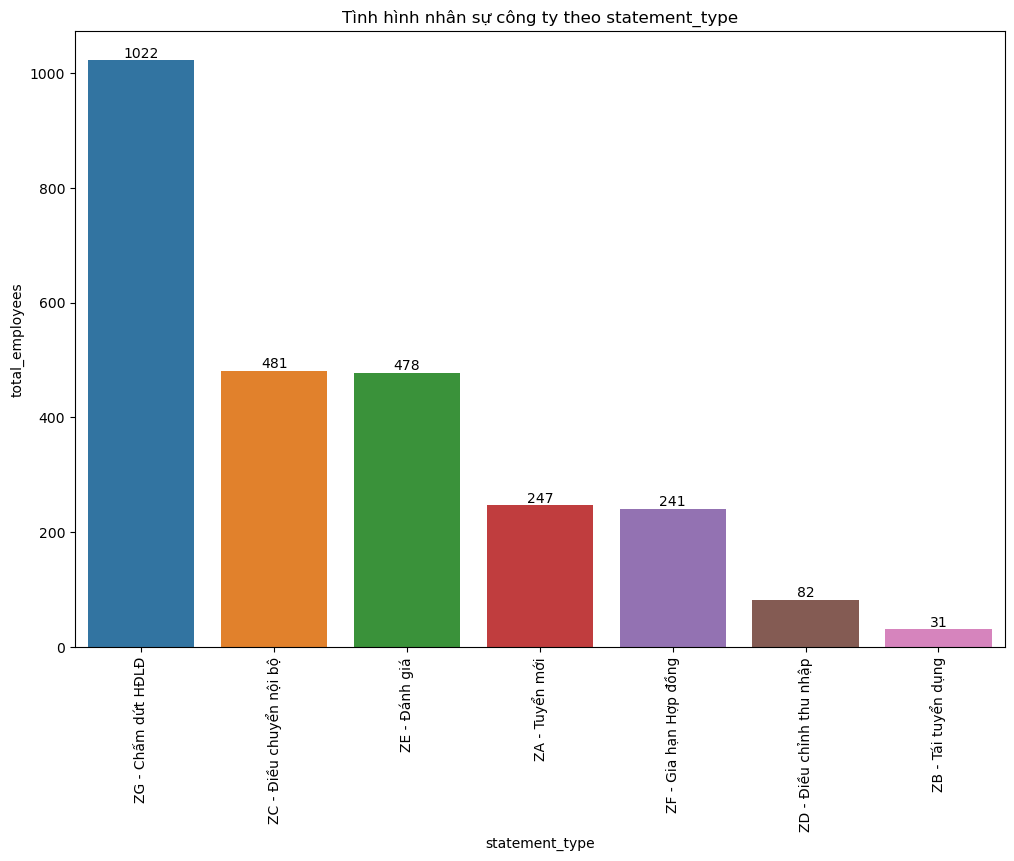

In [33]:
plt.figure(figsize=(12,8))

sns.barplot(df_statement_type_groupby, x='statement_type', y='total_employees')

for index, row in df_statement_type_groupby.iterrows():
    plt.text(index, row['total_employees'] + 5, row['total_employees'], ha='center')

plt.xticks(rotation=90)

plt.title('Tình hình nhân sự công ty theo statement_type')

plt.show()

In [34]:
df_statement_type_groupby['% nhân sự'] = np.round(df_statement_type_groupby['total_employees'] / sum(df_statement_type_groupby['total_employees']) * 100, 2)

df_statement_type_groupby

,statement_type,total_employees,% nhân sự
0,ZG - Chấm dứt HĐLĐ,1022,39.58
1,ZC - Điều chuyển nội bộ,481,18.63
2,ZE - Đánh giá,478,18.51
3,ZA - Tuyển mới,247,9.57
4,ZF - Gia hạn Hợp đồng,241,9.33
5,ZD - Điều chỉnh thu nhập,82,3.18
6,ZB - Tái tuyển dụng,31,1.20


Nhìn vào biểu đồ và con số của bảng thống kê phía trên ta có thể thấy công ty Topica đang có lượng nhân sự rời bỏ rất lớn (Chiếm tới 39.56% tổng số nhân viên của doanh nghiệp)

## 2.3. Phân tích tình hình nhân sự nghỉ việc theo năm

In [35]:
# Tạo thêm cột year và month
df['statement_valid_year'] = df['statement_valid_date'].dt.year
df['statement_valid_month'] = df['statement_valid_date'].dt.month

In [36]:
df_cham_dut_HDLD_groupby = df[df['statement_type'] == 'ZG - Chấm dứt HĐLĐ'].groupby(['statement_valid_year']).agg(
    total_employees = ('NG', 'count')
).sort_values(by='total_employees', ascending=False).reset_index()

df_cham_dut_HDLD_groupby

,statement_valid_year,total_employees
0,2019,1008
1,2018,13
2,2017,1


In [37]:
df_cham_dut_HDLD_groupby['% employees'] = np.round(df_cham_dut_HDLD_groupby['total_employees'] / sum(df_cham_dut_HDLD_groupby['total_employees']) * 100, 2)

df_cham_dut_HDLD_groupby

,statement_valid_year,total_employees,% employees
0,2019,1008,98.63
1,2018,13,1.27
2,2017,1,0.10


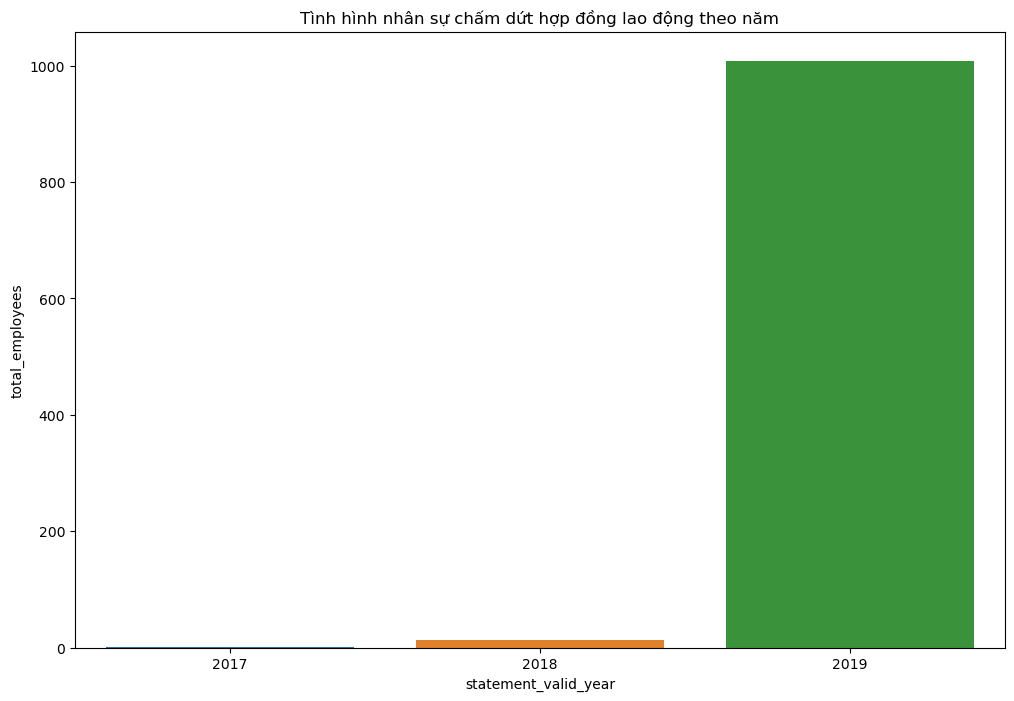

In [38]:
plt.figure(figsize=(12,8))

sns.barplot(df_cham_dut_HDLD_groupby, x='statement_valid_year', y='total_employees')

plt.title('Tình hình nhân sự chấm dứt hợp đồng lao động theo năm')

plt.show()

Dễ dàng nhìn thấy nhân sự hầu như đều rời bỏ vào năm 2019 (tỷ lệ nhân sự rời bỏ công ty là 98.63%) => Tại sao lại có sự rời bỏ của nhiều nhân sự như vậy?

In [39]:
df.head()

,employee_work_date,statement_type,statement_valid_date,statement_expired_date,statement_status,statement_name,PT,CB,NG,work_location,Leader_Code,Vị trí chuyên môn,Số năm thâm niên,statement_valid_year,statement_valid_month
0,2019-07-30,ZE - Đánh giá,2019-09-28,2100-12-31,active,EA - Đánh giá sau thử việc,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WMT-Chuyên gia Chạy số,Hà Nội,TRANGTTK,Chuyên viên,0.0,2019,9
1,2019-01-08,ZA - Tuyển mới,2019-01-08,2100-12-31,active,AD - Tuyển mới NV định biên còn thiếu ko thử việc,TE - Công ty CP giáo dục Topica English,CM1-Giám đốc Sản phẩm,IBB-Phân tích dữ liệu,Hà Nội,TUANPM,Giám đốc,1.0,2019,1
2,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên,1.0,2019,9
3,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,HANHPN,Chuyên viên,1.0,2019,9
4,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên,1.0,2019,9


## 2.4. Phân tích tình hình nhân sự nghỉ việc theo vị trí làm việc

In [40]:
# Ta sẽ thử xem xem có phải do địa điểm làm việc hay không?
df_work_location = df[df['statement_type'] == 'ZG - Chấm dứt HĐLĐ'].groupby(['work_location']).agg(
    total_employees = ('NG', 'count')
).sort_values(by='total_employees', ascending=False).reset_index()

df_work_location

,work_location,total_employees
0,Hà Nội,752
1,Thái Lan,133
2,TP Hồ Chí Minh,82
3,Không rõ,55


In [41]:
df_work_location['% employees'] = round(df_work_location['total_employees'] / sum(df_work_location['total_employees']) * 100, 2)

df_work_location

,work_location,total_employees,% employees
0,Hà Nội,752,73.58
1,Thái Lan,133,13.01
2,TP Hồ Chí Minh,82,8.02
3,Không rõ,55,5.38


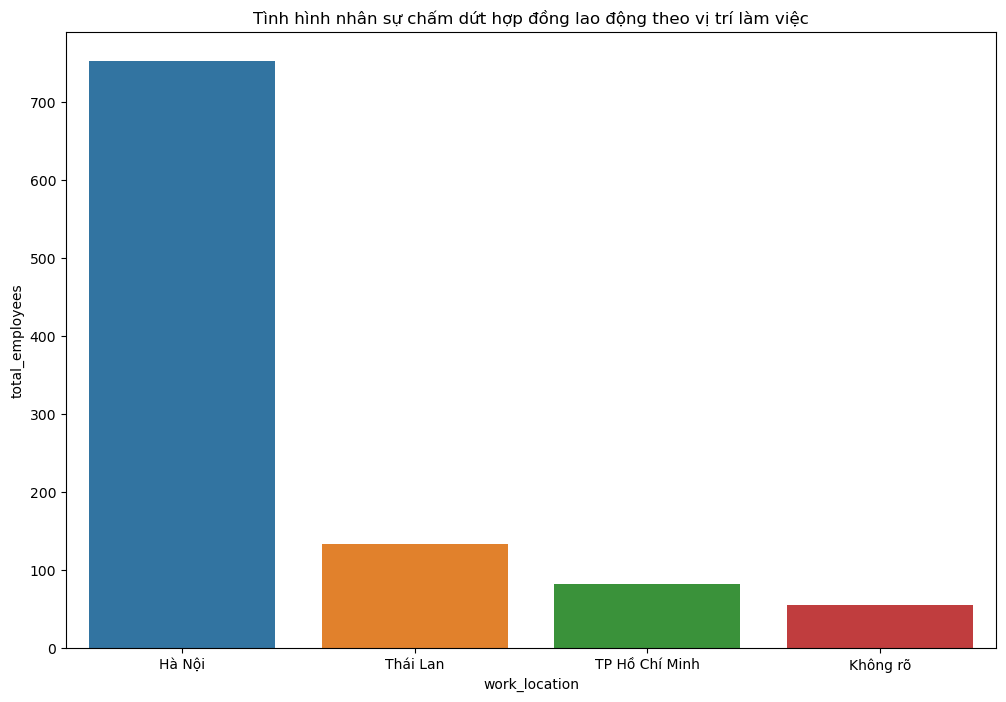

In [42]:
plt.figure(figsize=(12,8))

sns.barplot(df_work_location, x='work_location', y='total_employees')

plt.title('Tình hình nhân sự chấm dứt hợp đồng lao động theo vị trí làm việc')

plt.show()

Nhìn vào đây ta có thể thấy rất rõ là việc người lao động nghỉ việc đang tập trung vào khu vực Hà Nội => Cần đào sâu hơn nữa là tại sao nhân sự tại Hà Nội lại nghỉ việc nhiều như thế.

## 2.5. Phân tích tình hình nhân sự nghỉ việc ở Hà Nội

In [43]:
condition_hn_nghi_viec = (df['statement_type'] == 'ZG - Chấm dứt HĐLĐ') & (df['work_location'] == 'Hà Nội')

df_hn_nghi_viec = df[condition_hn_nghi_viec]

df_hn_nghi_viec.head()

,employee_work_date,statement_type,statement_valid_date,statement_expired_date,statement_status,statement_name,PT,CB,NG,work_location,Leader_Code,Vị trí chuyên môn,Số năm thâm niên,statement_valid_year,statement_valid_month
25,2019-12-08,ZG - Chấm dứt HĐLĐ,2019-01-10,2100-12-31,active,GA - Người lao động đơn phương,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WMT-Chuyên gia Chạy số,Hà Nội,QUYETVV,Chuyên viên,-1.0,2019,1
41,2019-12-08,ZG - Chấm dứt HĐLĐ,2019-01-10,2100-12-31,active,GA - Người lao động đơn phương,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Hà Nội,THUYDTT4,Chuyên viên,-1.0,2019,1
83,2017-02-01,ZG - Chấm dứt HĐLĐ,2019-09-30,2100-12-31,active,GC - Thỏa thuận,EDT - Công ty CP ĐT & PT đào tạo EDUTOP64,TM1-Giám đốc cao cấp Trung tâm,GGO-Chuyên gia Khác,Hà Nội,TRUNGNT,Giám đốc,3.0,2019,9
88,2018-01-08,ZG - Chấm dứt HĐLĐ,2019-08-31,2100-12-31,active,GC - Thỏa thuận,EDT - Công ty CP ĐT & PT đào tạo EDUTOP64,SX2-Chuyên gia cấp Khối,FFI-Chuyên gia Tài chính,Hà Nội,TRANGPT5,None,2.0,2019,8
98,2014-02-24,ZG - Chấm dứt HĐLĐ,2019-04-27,2100-12-31,active,GA - Người lao động đơn phương,EDT - Công ty CP ĐT & PT đào tạo EDUTOP64,PM1-Trưởng phòng cao cấp,WSS-Chuyên gia Tư vấn tuyển sinh,Hà Nội,TAMNT,Trưởng phòng,5.0,2019,4


In [44]:
# Ta sẽ kiểm tra xem các nhân sự tại Hà Nội nghỉ việc vào tháng nào trong năm
df_hn_nghi_viec_month = df_hn_nghi_viec.groupby(['statement_valid_month']).agg(
    total_employees = ('PT', 'count')
).reset_index()

df_hn_nghi_viec_month

,statement_valid_month,total_employees
0,1,250
1,2,73
2,3,52
3,4,46
4,5,86
5,6,58
6,7,42
7,8,45
8,9,35
9,10,36


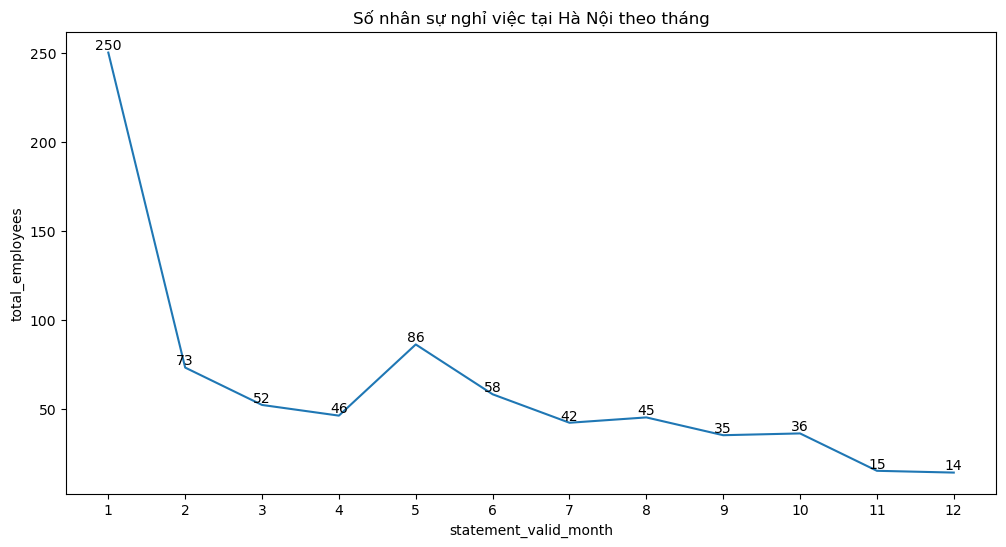

In [45]:
plt.figure(figsize=(12,6))

sns.lineplot(df_hn_nghi_viec_month, x='statement_valid_month', y='total_employees')

for index, row in df_hn_nghi_viec_month.iterrows():
    plt.text(row['statement_valid_month'], row['total_employees'], row['total_employees'], ha='center', va='bottom')

plt.title('Số nhân sự nghỉ việc tại Hà Nội theo tháng')
plt.xticks(range(1, 13))

plt.show()

Bạn có thể thấy số lượng nhân sự tại Hà Nội tập trung nghỉ việc vào tháng 1 (tháng thường mà các nhân sự thường nhận được thưởng tết) => khả năng lớn nhân sự sẽ chọn nhận thưởng tết xong xin nghỉ. Hoặc có thể chế độ thưởng tết của doanh nghiệp không làm vừa lòng người lao động nên dẫn đến việc các nhân sự nghỉ việc hàng loạt như vậy

Ta sẽ thử kiểm tra xem những vị trí nào đã nghỉ việc tại Hà Nội

In [46]:
df_hn_nghi_viec_vitri = df_hn_nghi_viec.groupby(['Vị trí chuyên môn']).agg(
    total_employees = ('PT', 'count')
).sort_values(by='total_employees', ascending=False).reset_index()

df_hn_nghi_viec_vitri

,Vị trí chuyên môn,total_employees
0,Chuyên viên,499
1,Cộng tác viên,142
2,Trưởng phòng,54
3,Giám đốc,26


In [47]:
df_hn_nghi_viec_vitri['% employees'] = round(df_hn_nghi_viec_vitri['total_employees'] / sum(df_hn_nghi_viec_vitri['total_employees']) * 100, 2)

df_hn_nghi_viec_vitri

,Vị trí chuyên môn,total_employees,% employees
0,Chuyên viên,499,69.21
1,Cộng tác viên,142,19.69
2,Trưởng phòng,54,7.49
3,Giám đốc,26,3.61


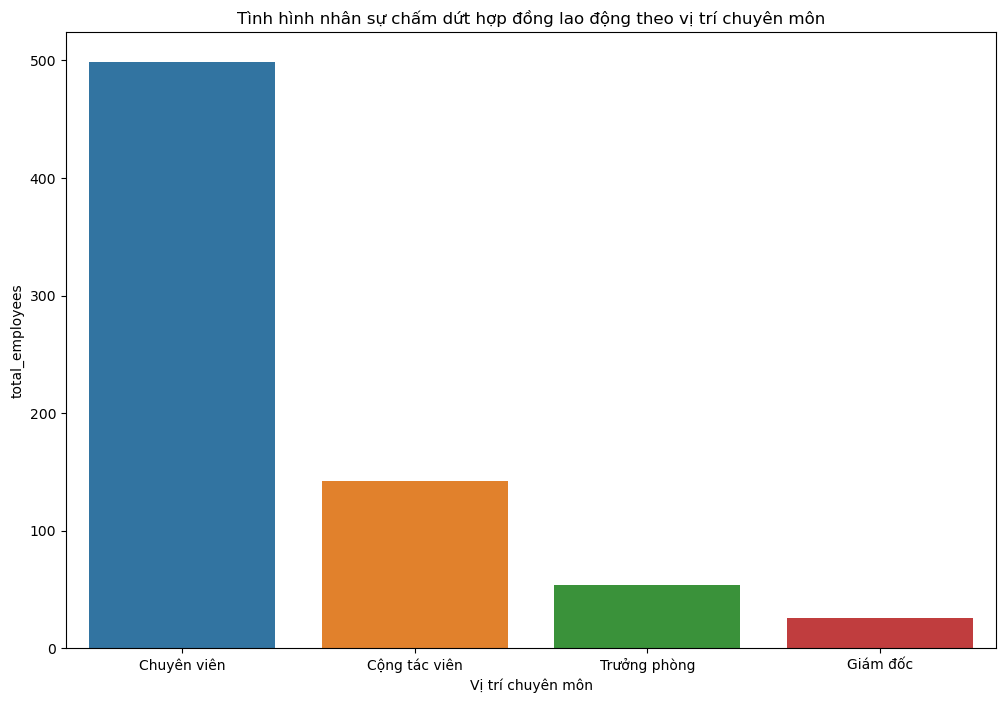

In [48]:
plt.figure(figsize=(12,8))

sns.barplot(df_hn_nghi_viec_vitri, x='Vị trí chuyên môn', y='total_employees')

plt.title('Tình hình nhân sự chấm dứt hợp đồng lao động theo vị trí chuyên môn')

plt.show()

Số nhân viên nghỉ việc tập trung vào các bạn có vị trí chuyên môn chỉ là chuyên viên (Chiếm tỷ lệ 69.21%) => Chúng ta sẽ cần kiểm tra xem các chuyên viên này có công việc cụ thể là gì?

Tuy nhiên 1 điều rất bất ngờ là số trưởng phòng và giám đốc nghỉ việc tại Hà Nội lại chiếm tới 13%. Đây là 1 con số khá lớn vì đây là các nhân sự cấp cao của công ty và luôn chiếm 1 tỷ lệ rất nhỏ trong công ty.

Việc công ty để mất các nhân sự cấp cao và phải tuyển mới các nhân sự cấp cao khác để bổ sung sẽ có nhiều rủi ro như chi phí tìm kiếm nhân sự, mức lương phải trả thường là cao hơn so với các nhân sự cũ của công ty. Hơn nữa muốn các nhân sự mới tiếp cận và hoàn thiện công việc tốt ngay như những nhân viên cũ là không đơn giản.

In [49]:
df_hn_nghi_viec[df_hn_nghi_viec['Vị trí chuyên môn'] == 'Chuyên viên']['NG'].value_counts()

NG
WSS-Chuyên gia Tư vấn tuyển sinh                   186
GGO-Chuyên gia Khác                                 87
WMT-Chuyên gia Chạy số                              72
ITS-Chuyên gia Phần mềm                             49
GCE-Chuyên gia Chăm sóc khách hàng bên ngoài        46
HHB-Chuyên gia Nhân sự                              17
GOO-Chuyên gia Vận hành Online                      17
FFI-Chuyên gia Tài chính                            17
GET-Chuyên gia Tuyển dụng và đào tạo Giảng viên      7
IUU-Chuyên gia Thiết kế UI/ UX hoặc Video            1
Name: count, dtype: int64

Nếu nhìn vào các con số mà chúng ta đang có thì đa phần các nhân sự cấp thấp xin nghỉ việc nằm ở Tư vấn tuyển sinh và chạy số (bộ phận Sales) của công ty. 

Điều này đặt 1 dấu hỏi là tại sao các nhân viên Sales lại nghỉ nhiều như vậy? 

Doanh số không đạt đủ nên tự nghỉ hoặc bị buộc thôi việc? 

=> Khả năng cao năm 2019 là 1 năm mà doanh số của công ty sụt giảm mạnh nên những bạn Sales không đạt dủ doanh số sẽ bị cho thôi việc hàng loạt

Vậy nhân sự nghỉ việc có thể do Leader của họ quá khó khăn? Chúng ta sẽ cùng kiểm tra xem

In [50]:
# Ta sẽ lấy ra tên của 10 Leader có số nhân viên nghỉ việc hàng loạt
df_hn_nghi_viec[df_hn_nghi_viec['Leader_Code'] != 'No Leader'].groupby(['Leader_Code']).agg(
    total_employees = ('PT', 'count')
).sort_values(by='total_employees', ascending=False).reset_index().head(10)

,Leader_Code,total_employees
0,QUANGDH,80
1,HAONT2,67
2,TAMNN,27
3,QUYETVV,26
4,TRANGTTK,21
5,HUENT8,21
6,HUONGNT3,20
7,LINHPVP,19
8,TRUNGNT,19
9,TAMNT,18


Có thể thấy việc nghỉ việc của nhân viên có thể do chính Leader của họ. Ví dụ như 2 bạn QUANGDH và HAONT2 có số nhân sự lên tới 67 và 80 người (Quá nhiều chỉ trong vòng 1 năm)

Bộ phận nhân sự cần làm việc với các bạn Leader này và tìm hiểu lý do vì sao nhân viên dưới quyền họ lại rời đi nhiều như vậy.

## 2.5. Phân tích tình hình tuyển mới nhân sự

In [51]:
df_new_recruit = df[df['statement_type'] == 'ZA - Tuyển mới'].groupby(['statement_valid_month']).agg(
    total_employees = ('PT', 'count')
).reset_index()

df_new_recruit

,statement_valid_month,total_employees
0,1,66
1,2,7
2,3,9
3,4,7
4,5,6
5,6,13
6,7,41
7,8,34
8,9,32
9,10,8


In [52]:
df_churn_employees = df[df['statement_type'] == 'ZG - Chấm dứt HĐLĐ'].groupby(['statement_valid_month']).agg(
    total_employees = ('PT', 'count')
).reset_index()

df_churn_employees

,statement_valid_month,total_employees
0,1,326
1,2,86
2,3,76
3,4,72
4,5,106
5,6,79
6,7,66
7,8,78
8,9,46
9,10,46


In [53]:
df_new_recruit_churn = pd.merge(df_new_recruit, df_churn_employees, how='left', on='statement_valid_month')

df_new_recruit_churn

,statement_valid_month,total_employees_x,total_employees_y
0,1,66,326
1,2,7,86
2,3,9,76
3,4,7,72
4,5,6,106
5,6,13,79
6,7,41,66
7,8,34,78
8,9,32,46
9,10,8,46


In [54]:
df_new_recruit_churn.rename(
    columns={
        'total_employees_x': 'new employees',
        'total_employees_y': 'churn employees'
    }, inplace=True
)

df_new_recruit_churn

,statement_valid_month,new employees,churn employees
0,1,66,326
1,2,7,86
2,3,9,76
3,4,7,72
4,5,6,106
5,6,13,79
6,7,41,66
7,8,34,78
8,9,32,46
9,10,8,46


In [55]:
df_new_recruit_churn['Different'] = df_new_recruit_churn['new employees'] - df_new_recruit_churn['churn employees']

df_new_recruit_churn

,statement_valid_month,new employees,churn employees,Different
0,1,66,326,-260
1,2,7,86,-79
2,3,9,76,-67
3,4,7,72,-65
4,5,6,106,-100
5,6,13,79,-66
6,7,41,66,-25
7,8,34,78,-44
8,9,32,46,-14
9,10,8,46,-38


Nhìn vào bảng trên bạn có thể dễ dàng thấy được là bạn không thể tuyển bù đủ số nhân sự đã nghỉ việc. Vì thế số chênh lệch giữa nhân sự nghỉ việc và nhân sự tuyển mới luôn là số âm

Điều này cho thấy công ty cần tập trung giữ chân các nhân sự cũ để đảm bảo được số lượng nhân viên có thể làm việc. Thay vì sự sụt giảm quá lớn nhân sự mà không thể tuyển đủ người thay thế như này

## 2.6. Phân tích nhân sự rời đi theo số năm thâm niên

In [56]:
# Loại bỏ đi các giá trị Số năm thâm niên tính ra < 0
condition = (df['statement_type'] == 'ZG - Chấm dứt HĐLĐ') & (df['Số năm thâm niên'] >= 0)

df_seniority = df[condition].groupby(['Số năm thâm niên']).agg(
    total_employees = ('PT', 'count')
).reset_index()

df_seniority

,Số năm thâm niên,total_employees
0,0.0,340
1,1.0,345
2,2.0,153
3,3.0,99
4,4.0,33
5,5.0,17
6,6.0,3
7,7.0,3
8,8.0,2
9,9.0,1


In [57]:
df_seniority['% employees'] = np.round(df_seniority['total_employees'] / sum(df_seniority['total_employees']) * 100, 2)

df_seniority

,Số năm thâm niên,total_employees,% employees
0,0.0,340,34.03
1,1.0,345,34.53
2,2.0,153,15.32
3,3.0,99,9.91
4,4.0,33,3.30
5,5.0,17,1.70
6,6.0,3,0.30
7,7.0,3,0.30
8,8.0,2,0.20
9,9.0,1,0.10


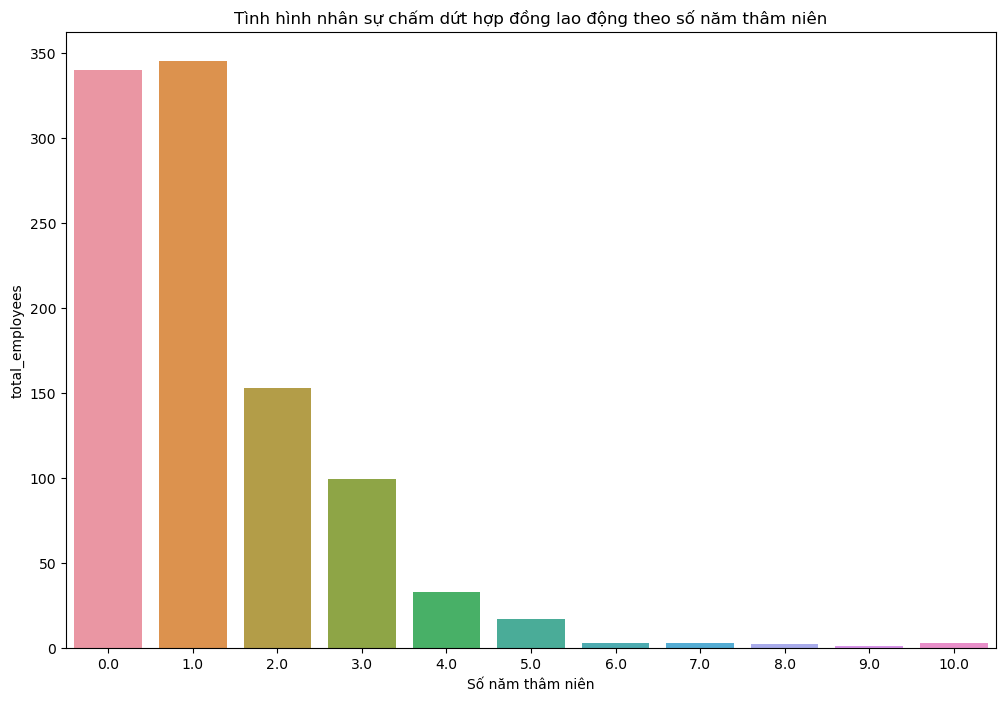

In [58]:
plt.figure(figsize=(12,8))

sns.barplot(df_seniority, x='Số năm thâm niên', y='total_employees')

plt.title('Tình hình nhân sự chấm dứt hợp đồng lao động theo số năm thâm niên')

plt.show()

Thông qua kết quả thu được thì các nhân viên nghỉ việc tại công ty tập trung vào nhóm nhân viên làm việc từ 1 năm kinh nghiệm trở xuống (Nhóm này chiếm trên 60% lượng nhân sự nghỉ việc)

Tuy nhiên số nhân sự có thâm niên làm việc tại công ty từ trên 3 năm trở lên cũng xấp xỉ 15% => điều này chứng tỏ những nhân sự dù đã gắn bó lâu năm với công ty cũng sẽ rời đi nhiều 

In [59]:
# Loại bỏ đi các giá trị Số năm thâm niên tính ra < 0
condition = (df['statement_type'] == 'ZG - Chấm dứt HĐLĐ') & (df['Số năm thâm niên'] >= 0)

df_seniority_vitrichuyenmon = df[condition].groupby(['Số năm thâm niên', 'Vị trí chuyên môn']).agg(
    total_employees = ('PT', 'count')
).reset_index()

df_seniority_vitrichuyenmon

,Số năm thâm niên,Vị trí chuyên môn,total_employees
0,0.0,Chuyên viên,286
1,0.0,Cộng tác viên,27
2,0.0,Giám đốc,7
3,0.0,Trưởng phòng,3
4,1.0,Chuyên viên,257
5,1.0,Cộng tác viên,57
6,1.0,Giám đốc,11
7,1.0,Trưởng phòng,9
8,2.0,Chuyên viên,92
9,2.0,Cộng tác viên,33


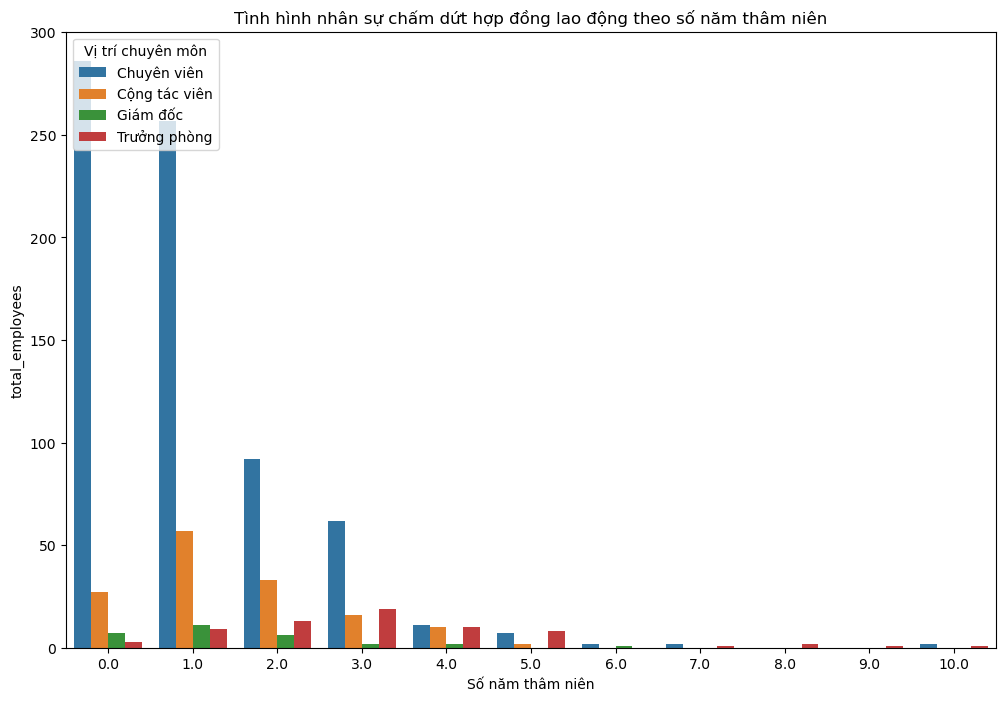

In [60]:
plt.figure(figsize=(12,8))

sns.barplot(df_seniority_vitrichuyenmon, x='Số năm thâm niên', y='total_employees', hue='Vị trí chuyên môn')

plt.title('Tình hình nhân sự chấm dứt hợp đồng lao động theo số năm thâm niên')

plt.show()

Nhìn vào đây bạn có thể thấy các nhân sự từ cấp trưởng phòng có thâm niên cao cũng có xu hướng rời bỏ công ty

## 2.7. Phân tích tỷ lệ nhân sự rời bỏ theo lý do

In [61]:
df.head()

,employee_work_date,statement_type,statement_valid_date,statement_expired_date,statement_status,statement_name,PT,CB,NG,work_location,Leader_Code,Vị trí chuyên môn,Số năm thâm niên,statement_valid_year,statement_valid_month
0,2019-07-30,ZE - Đánh giá,2019-09-28,2100-12-31,active,EA - Đánh giá sau thử việc,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WMT-Chuyên gia Chạy số,Hà Nội,TRANGTTK,Chuyên viên,0.0,2019,9
1,2019-01-08,ZA - Tuyển mới,2019-01-08,2100-12-31,active,AD - Tuyển mới NV định biên còn thiếu ko thử việc,TE - Công ty CP giáo dục Topica English,CM1-Giám đốc Sản phẩm,IBB-Phân tích dữ liệu,Hà Nội,TUANPM,Giám đốc,1.0,2019,1
2,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên,1.0,2019,9
3,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,HANHPN,Chuyên viên,1.0,2019,9
4,2019-01-08,ZF - Gia hạn Hợp đồng,2019-09-30,2100-12-31,active,FA - Gia hạn do hết hạn HD,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WSS-Chuyên gia Tư vấn tuyển sinh,Không rõ,LINHTTK,Chuyên viên,1.0,2019,9


In [62]:
condition = df['statement_type'] == 'ZG - Chấm dứt HĐLĐ'

df_statement_name = df[condition].groupby(['statement_name']).agg(
    total_employees = ('PT', 'count')
).sort_values(by='total_employees', ascending=False).reset_index()

df_statement_name['% employees'] = np.round(df_statement_name['total_employees'] / sum(df_statement_name['total_employees']) * 100, 2)

df_statement_name

,statement_name,total_employees,% employees
0,GA - Người lao động đơn phương,907,88.75
1,GC - Thỏa thuận,102,9.98
2,GB - Công ty đơn phương,13,1.27


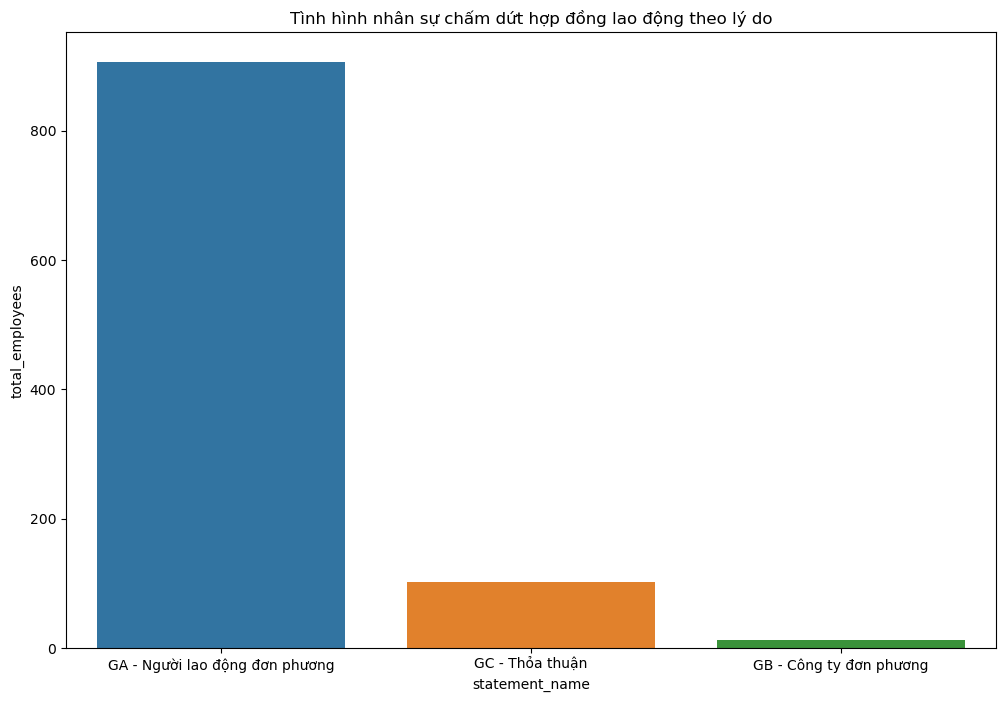

In [63]:
plt.figure(figsize=(12,8))

sns.barplot(df_statement_name, x='statement_name', y='total_employees')

plt.title('Tình hình nhân sự chấm dứt hợp đồng lao động theo lý do')

plt.show()

Nhìn vào đây bạn có thể thấy đa phần lý do chấm dứt hợp đồng lao động là người lao động đơn phương chấm dứt hợp đồng lao động (chiếm 88.75%). Còn việc công ty đơn phương cho nghỉ là rất ít (chỉ chiếm 1.27%) => Đây là việc mà công ty cần phải xem xét khi có vẻ lý do mà người lao động xin nghỉ hàng loạt là tới từ bản thân công ty chứ không phải tại người lao động.

# 3. Kết luận

Sau khi tiến hành phân tích dữ liệu của công ty Topica chúng ta có thể dễ dàng nhận thấy những điều sau.

- Nhân sự của công ty rời đi hàng loạt vào năm 2019. Trong năm này những người rời đó có cả những người lao động có thâm niên làm việc lâu tại doanh nghiệp hoặc có chức vụ cao từ cấp trưởng phòng trở lên. Lý do của việc này là do kết quả làm ăn thua lỗ của Topica Group trong nhiều năm và con số thua lỗ đặc biệt lớn vào năm 2019

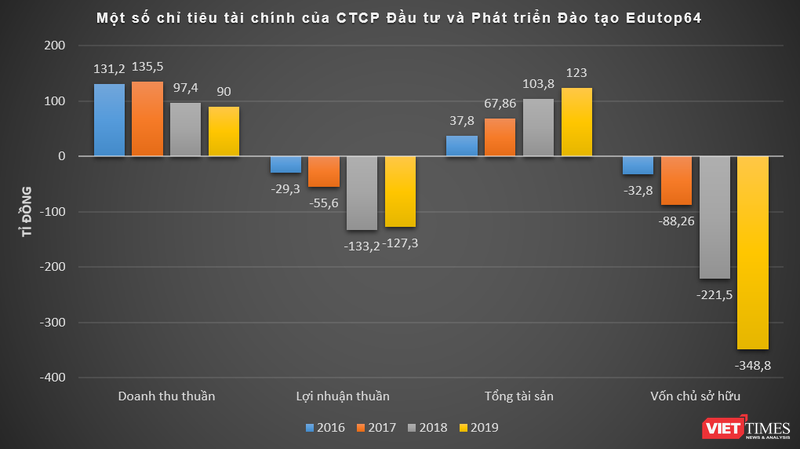

Như bạn thấy ở biểu đồ trên thì Topica Group đã liên tục thua lỗ từ năm 2016 đến nay. Đặc biệt 2 năm 2018 và 2019 thì số lỗ cực kỳ lớn lên tới 133.2 tỷ và 127.3 tỷ. Đây có lẽ là 1 trong những lý do khiến cho các nhân sự rời bỏ công ty rất nhiều.

Ngoài ra như bạn thấy doanh thu của Topica có xu hướng giảm đều tính từ năm 2018 (Chỉ lần lượt đạt 97.4 tỷ và 90 tỷ thay vì các con số trên 130 tỷ như các năm trước đó)

Thậm chí vốn chủ sở hữu của Topica đã âm đến 348.8 tỷ trong năm 2019

- Số nhân sự thôi việc nhiều nhất của Topica tập trung ở khu vực Hà Nội. Tại đây có những Leader như QUANGDH, HAONT2 có số nhân sự làm việc dưới họ thôi việc rất nhiều. Cần làm rõ với các bạn Leader này để đưa ra phương án giải quyết.

- Công ty cần tăng cường tuyển mới nhân sự để bổ sung vào số nhân sự rất lớn đã rời đi chỉ trong năm 2019. Hiện con số tuyển mới so với số nhân sự đã rời đi của công ty chỉ đạt tầm 24% tính trên tổng số nhân sự rời đi. Con số này là không đủ để khoả lấp các vị trí đã nghỉ tại công ty.

- Cần có chính sách giữ chân các nhân sự cốt cán của công ty thay vì để họ ra đi nhiều như vậy trong năm 2019 (Số nhân sự cấp cao rời đi là 13% tổng số nhân viên nghỉ việc)

- Cần có chính sách tốt hơn cho các nhân sự có số năm thâm niên cao tại công ty. Ví dụ thưởng tiền, vàng hoặc tăng lương thưởng để giữ chân họ ở lại với công ty